<a href="https://colab.research.google.com/github/Vamsi-Akhumukhi/Machine-Learning/blob/master/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from math import exp
import scipy.optimize as opt
import matplotlib.animation as animation
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading the Data**

In [0]:
fit = pd.read_csv('/content/drive/My Drive/Machine Learning/adult_data.csv',na_values='?')

In [0]:
data=[fit]

In [0]:
fit

,Age,WorkClass,Final_weight,Education,Education_num,Martial_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<BarContainer object of 15 artists>

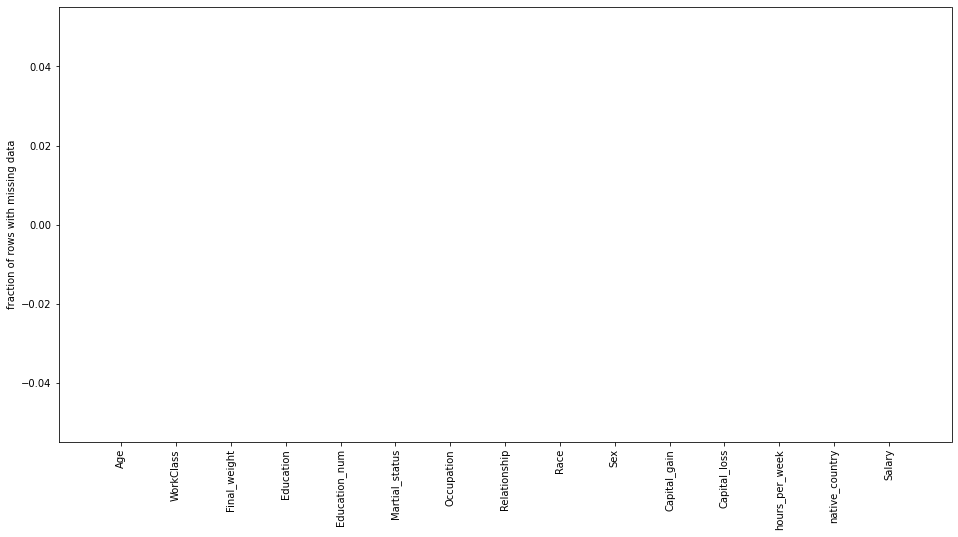

In [0]:
null_counts = fit.isnull().sum()/len(fit)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [0]:
fit['WorkClass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64

In [0]:
fit= fit.replace('[?]', np.nan, regex=True)
print(fit[25:40])

    Age          WorkClass  ...  native_country  Salary
25   56          Local-gov  ...   United-States    >50K
26   19            Private  ...   United-States   <=50K
27   54                NaN  ...           South    >50K
28   39            Private  ...   United-States   <=50K
29   49            Private  ...   United-States   <=50K
30   23          Local-gov  ...   United-States   <=50K
31   20            Private  ...   United-States   <=50K
32   45            Private  ...   United-States   <=50K
33   30        Federal-gov  ...   United-States   <=50K
34   22          State-gov  ...   United-States   <=50K
35   48            Private  ...     Puerto-Rico   <=50K
36   21            Private  ...   United-States   <=50K
37   19            Private  ...   United-States   <=50K
38   31            Private  ...             NaN    >50K
39   48   Self-emp-not-inc  ...   United-States   <=50K

[15 rows x 15 columns]


In [0]:
from collections import Counter

In [0]:
# summarize the class distribution
target = fit.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class= <=50K, Count=24720, Percentage=75.919%
Class= >50K, Count=7841, Percentage=24.081%


In [0]:
import seaborn as sns

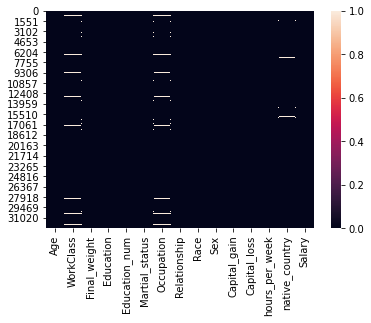

In [0]:
sns.heatmap(fit.isna(), cbar=True,)

Dropping NA values

In [0]:
fit = fit.dropna()
fit

,Age,WorkClass,Final_weight,Education,Education_num,Martial_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [0]:
fit['Salary'].value_counts()

 <=50K    22654
 >50K      7508
Name: Salary, dtype: int64

In [0]:
!pip install heatmapz

In [0]:
# Converting Salary to 0 and 1
salary_map={' <=50K':1,' >50K':0}
fit['Salary']=fit['Salary'].map(salary_map).astype(int)

ValueError: ignored

In [0]:
fit['Salary'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    0
9    0
Name: Salary, dtype: int64

In [0]:
# Converting Sex to integer
fit['Sex'] = fit['Sex'].map({' Male':1,' Female':0}).astype(int)

In [0]:
print (fit.head(10))
print (("-"*40))
print (fit.info())

   Age          WorkClass  Final_weight  ... hours_per_week  native_country Salary
0   39          State-gov         77516  ...             40   United-States      1
1   50   Self-emp-not-inc         83311  ...             13   United-States      1
2   38            Private        215646  ...             40   United-States      1
3   53            Private        234721  ...             40   United-States      1
4   28            Private        338409  ...             40            Cuba      1
5   37            Private        284582  ...             40   United-States      1
6   49            Private        160187  ...             16         Jamaica      1
7   52   Self-emp-not-inc        209642  ...             45   United-States      0
8   31            Private         45781  ...             50   United-States      0
9   42            Private        159449  ...             40   United-States      0

[10 rows x 15 columns]
----------------------------------------
<class 'pandas.core.fr

In [0]:
# Categorize between US and Non -Us
fit['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [0]:
data=[fit]

In [0]:
for dataset in data:
    dataset.loc[dataset['native_country'] != ' United-States', 'native_country'] = 'Non-US'
    dataset.loc[dataset['native_country'] == ' United-States', 'native_country'] = 'US'

In [0]:
fit

,Age,WorkClass,Final_weight,Education,Education_num,Martial_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,US,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,US,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,US,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,US,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Non-US,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,US,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,US,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,US,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,US,1


In [0]:
fit['native_country'] = fit['native_country'].map({'US':1,'Non-US':0}).astype(int)

In [0]:
fit['native_country'].head(10)

0    1
1    1
2    1
3    1
4    0
5    1
6    0
7    1
8    1
9    1
Name: native_country, dtype: int64

# Conerting Martial status into numerical

In [0]:
fit['Martial_status'] = fit['Martial_status'].replace([' Divorced',
                                                       ' Married-spouse-absent',
                                                       ' Never-married',
                                                       ' Separated',
                                                       ' Widowed'],
                                                      'Single')
fit['Martial_status'] = fit['Martial_status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')

In [0]:
fit['Martial_status'].head(10)

0    Single
1    Couple
2    Single
3    Couple
4    Couple
5    Couple
6    Single
7    Couple
8    Single
9    Couple
Name: Martial_status, dtype: object

In [0]:
fit['Martial_status'] = fit['Martial_status'].map({'Couple':0,'Single':1})

In [0]:
fit.Martial_status.head(10)

0    1
1    0
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    0
Name: Martial_status, dtype: int64

Converting Relationship to Numerical

In [0]:
fit[['Martial_status','Relationship','Salary']].groupby(['Relationship','Martial_status']).mean()

Salary
Relationship    Martial_status          
 Husband        0               0.544331
 Not-in-family  0               0.714286
                1               0.893802
 Other-relative 0               0.857143
                1               0.976623
 Own-child      0               0.821429
                1               0.988818
 Unmarried      1               0.933686
 Wife           0               0.506401

In [0]:
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}

In [0]:
fit['Relationship'] =fit['Relationship'].map(rel_map)

In [0]:
fit.head(10)

,Age,WorkClass,Final_weight,Education,Education_num,Martial_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country,Salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,1,5178,0,40,1,0


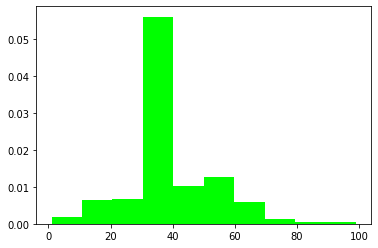

In [0]:
x=fit['hours_per_week']
plt.hist(x,bins=None,density=True,histtype='bar',color = 'lime')
plt.show()

# Analyzing Race


In [0]:
fit[['Race','Salary']].groupby('Race').mean()

,Salary
Race,
Amer-Indian-Eskimo,0.881119
Asian-Pac-Islander,0.722905
Black,0.870075
Other,0.909091
White,0.736282


In [0]:
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}

In [0]:
fit['Race']= fit['Race'].map(race_map)

In [0]:
fit.Race.head(10)

0    0
1    0
2    0
3    3
4    3
5    0
6    3
7    0
8    0
9    0
Name: Race, dtype: int64

In [0]:
fit.drop(labels=['WorkClass','Final_weight','Education','Occupation'],axis=1,inplace=True)
fit.head(10)

,Age,Education_num,Martial_status,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country,Salary
0,39,13,1,3,0,1,2174,0,40,1,1
1,50,13,0,2,0,1,0,0,13,1,1
2,38,9,1,3,0,1,0,0,40,1,1
3,53,7,0,2,3,1,0,0,40,1,1
4,28,13,0,1,3,0,0,0,40,0,1
5,37,14,0,1,0,0,0,0,40,1,1
6,49,5,1,3,3,0,0,0,16,0,1
7,52,9,0,2,0,1,0,0,45,1,0
8,31,14,1,3,0,0,14084,0,50,1,0
9,42,13,0,2,0,1,5178,0,40,1,0


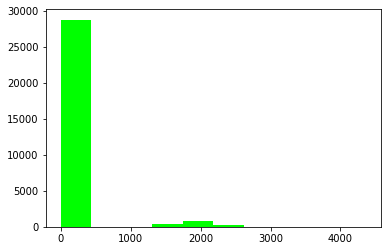

In [0]:
x=fit['Capital_loss']
plt.hist(x,bins=None,color = 'lime')
plt.show()

In [0]:
# Converting Capital gain to Numeric
fit.loc[(fit['Capital_gain'] > 0),'Capital_gain'] = 1
fit.loc[(fit['Capital_gain'] == 0 ,'Capital_gain')]= 0

In [0]:
# Converting Capital Loss to Numeric
fit.loc[(fit['Capital_loss'] > 0),'Capital_loss'] = 1
fit.loc[(fit['Capital_loss'] == 0 ,'Capital_loss')]= 0

In [0]:
fit.head(10)

,Age,Education_num,Martial_status,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country,Salary
0,39,13,1,3,0,1,1,0,40,1,1
1,50,13,0,2,0,1,0,0,13,1,1
2,38,9,1,3,0,1,0,0,40,1,1
3,53,7,0,2,3,1,0,0,40,1,1
4,28,13,0,1,3,0,0,0,40,0,1
5,37,14,0,1,0,0,0,0,40,1,1
6,49,5,1,3,3,0,0,0,16,0,1
7,52,9,0,2,0,1,0,0,45,1,0
8,31,14,1,3,0,0,1,0,50,1,0
9,42,13,0,2,0,1,1,0,40,1,0


In [0]:
from heatmap import heatmap, corrplot

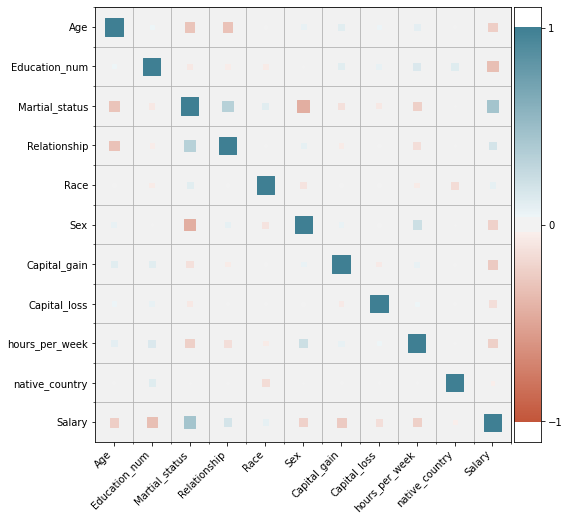

In [0]:
plt.figure(figsize=(8, 8))
corrplot(fit.corr(), size_scale=300);

# Magic begins


In [0]:
import statsmodels.api as sm
from math import exp
import scipy.optimize as opt
import matplotlib.animation as animation
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

In [0]:
x = fit.copy()

In [0]:
x.drop(['Salary'],axis=1,inplace=True)

In [0]:
x

,Age,Education_num,Martial_status,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country
0,39,13,1,3,0,1,1,0,40,1
1,50,13,0,2,0,1,0,0,13,1
2,38,9,1,3,0,1,0,0,40,1
3,53,7,0,2,3,1,0,0,40,1
4,28,13,0,1,3,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,1,0,0,0,0,38,1
32557,40,9,0,2,0,1,0,0,40,1
32558,58,9,1,0,0,0,0,0,40,1
32559,22,9,1,4,0,1,0,0,20,1


In [0]:
y=fit.copy()

In [0]:
y.drop(['Age','Education_num','Martial_status','Relationship','Race','Sex','Capital_gain',
        'Capital_loss','hours_per_week','native_country'],axis=1,inplace=True)

In [0]:
y

,Salary
0,1
1,1
2,1
3,1
4,1
...,...
32556,1
32557,0
32558,1
32559,1


Normalization

In [0]:
from sklearn import preprocessing

# Data Normalization
normalized_X = preprocessing.scale(x)
X= normalized_X # Normalised Data
X= np.asarray(X)

In [0]:
X

array([[ 0.04279571,  1.12891838,  0.93606249, ..., -0.22284679,
        -0.07773411,  0.31087053],
       [ 0.88028814,  1.12891838, -1.06830474, ..., -0.22284679,
        -2.3315307 ,  0.31087053],
       [-0.03333996, -0.4397382 ,  0.93606249, ..., -0.22284679,
        -0.07773411,  0.31087053],
       ...,
       [ 1.48937355, -0.4397382 ,  0.93606249, ..., -0.22284679,
        -0.07773411,  0.31087053],
       [-1.25151078, -0.4397382 ,  0.93606249, ..., -0.22284679,
        -1.74721307,  0.31087053],
       [ 1.0325595 , -0.4397382 , -1.06830474, ..., -0.22284679,
        -0.07773411,  0.31087053]])

In [0]:
y=np.asarray(y)
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [0]:
X=np.hstack(((np.ones(len(X))).reshape(-1,1),X))

In [0]:
X

array([[ 1.        ,  0.04279571,  1.12891838, ..., -0.22284679,
        -0.07773411,  0.31087053],
       [ 1.        ,  0.88028814,  1.12891838, ..., -0.22284679,
        -2.3315307 ,  0.31087053],
       [ 1.        , -0.03333996, -0.4397382 , ..., -0.22284679,
        -0.07773411,  0.31087053],
       ...,
       [ 1.        ,  1.48937355, -0.4397382 , ..., -0.22284679,
        -0.07773411,  0.31087053],
       [ 1.        , -1.25151078, -0.4397382 , ..., -0.22284679,
        -1.74721307,  0.31087053],
       [ 1.        ,  1.0325595 , -0.4397382 , ..., -0.22284679,
        -0.07773411,  0.31087053]])

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.25,
                                                random_state=42)

In [0]:
len(X_train), len(X_test)

(22621, 7541)

In [0]:
def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

In [0]:
def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  # gives multidimensional array

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)  # average
    return dw

In [0]:
def sgd(features, outputs):
    max_epochs = 100
    weights = np.array([0,0,0,0,0,0,0,0,0,0,0])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    J_history=[]
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
            J_history.append(cost)
    return weights,J_history

In [0]:
regularization_strength = 100
learning_rate = 0.5

In [0]:
# Training the model
W,J_history=sgd(X_train,y_train)

Epoch is: 1 and Cost is: 64950616.66954408
Epoch is: 2 and Cost is: 85814516.7868933
Epoch is: 4 and Cost is: 2244751.1160014216
Epoch is: 8 and Cost is: 45447118.64829404
Epoch is: 16 and Cost is: 14714540.629473215
Epoch is: 32 and Cost is: 4344601.036239334
Epoch is: 64 and Cost is: 37090385.394482166
Epoch is: 99 and Cost is: 46900813.34246465


In [0]:
W

array([7.06868769, 7.06868769, 7.06868769])

In [0]:
print("training the model...")
y_train_predicted = np.array([])
for i in range(X_train.shape[0]):
    yp = np.sign(np.dot(X_train[i], W))
    y_train_predicted = np.append(y_train_predicted, yp)

training the model...


In [0]:
y_train_predicted

array([ 1.,  1., -1., ...,  1.,  1.,  1.])

In [0]:
y_test_predicted = np.array([])
for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(X_test[i], W))
    y_test_predicted = np.append(y_test_predicted, yp)

In [0]:
print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))

accuracy on test dataset: 0.4894576316138443


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_test, y_test_predicted, labels=None, sample_weight=None, normalize=None)

In [0]:
#converting y_test to one dimension
abc = np.array(y_test).ravel()
abc = np.ndarray.tolist(abc)

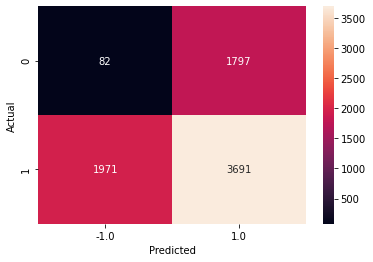

In [0]:
data = {'y_Actual':    abc,
        'y_Predicted': y_test_predicted.tolist()
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], 
                               df['y_Predicted'], 
                               rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.show()

In [0]:
confusion_matrix

Predicted,-1.0,1.0
Actual,,
0,82,1797
1,1971,3691


In [0]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train,y_train)
y_score = classifier.decision_function(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,y_score)

print('Average Precision-Recall score : {0:0.2f}'.format(average_precision))

Average Precision-Recall score : 0.95


In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
principalDf

array([[ 0.3611508 , -1.06582651],
       [ 0.48002773,  0.03450933],
       [-0.41751607, -0.62298376],
       ...,
       [ 0.09665751,  1.5659688 ],
       [-1.40701567, -1.13857703],
       [ 1.0930337 ,  1.08675433]])

In [0]:
principalDf = np.asarray(principalDf)

In [0]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=100,coef0=13.19098827)
model.fit(principalDf[0:22621], y[0:22621])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
    coef0=13.19098827, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

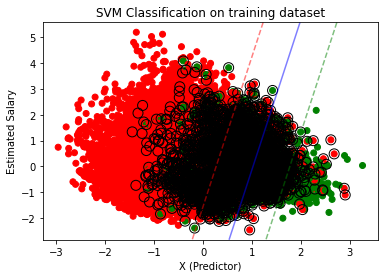

In [0]:
ax = plt.gca()
color = ['green' if c == 0 else 'red' for c in y[0:22621]]
plt.scatter(principalDf[0:22621, 0], principalDf[0:22621, 1], c=color)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors=['green','blue','red'], levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
ax.set_ylabel('Estimated Salary')
ax.set_xlabel('X (Predictor)')
ax.set_title('SVM Classification on training dataset')
plt.show()

In [0]:

model = SVC(kernel='linear', C=100,coef0=13.19098827)
model.fit(principalDf[22621:], y[22621:])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
    coef0=13.19098827, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

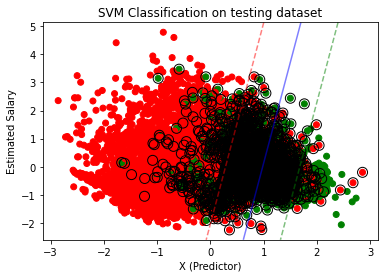

In [0]:
ax = plt.gca()
color = ['green' if c == 0 else 'red' for c in y[22621:]]
plt.scatter(principalDf[22621:, 0], principalDf[22621:, 1], c=color)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors=['green','blue','red'], levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
ax.set_ylabel('Estimated Salary')
ax.set_xlabel('X (Predictor)')
ax.set_title('SVM Classification on testing dataset')
plt.show()

# Logistic regression

In [0]:
X

array([[ 1.        ,  0.04279571,  1.12891838, ..., -0.22284679,
        -0.07773411,  0.31087053],
       [ 1.        ,  0.88028814,  1.12891838, ..., -0.22284679,
        -2.3315307 ,  0.31087053],
       [ 1.        , -0.03333996, -0.4397382 , ..., -0.22284679,
        -0.07773411,  0.31087053],
       ...,
       [ 1.        ,  1.48937355, -0.4397382 , ..., -0.22284679,
        -0.07773411,  0.31087053],
       [ 1.        , -1.25151078, -0.4397382 , ..., -0.22284679,
        -1.74721307,  0.31087053],
       [ 1.        ,  1.0325595 , -0.4397382 , ..., -0.22284679,
        -0.07773411,  0.31087053]])

In [0]:
m , n = X.shape[0], X.shape[1]
X= np.append(np.ones((m,1)),X,axis=1)
X

array([[ 1.        ,  0.04279571,  1.12891838, ..., -0.22284679,
        -0.07773411,  0.31087053],
       [ 1.        ,  0.88028814,  1.12891838, ..., -0.22284679,
        -2.3315307 ,  0.31087053],
       [ 1.        , -0.03333996, -0.4397382 , ..., -0.22284679,
        -0.07773411,  0.31087053],
       ...,
       [ 1.        ,  1.48937355, -0.4397382 , ..., -0.22284679,
        -0.07773411,  0.31087053],
       [ 1.        , -1.25151078, -0.4397382 , ..., -0.22284679,
        -1.74721307,  0.31087053],
       [ 1.        ,  1.0325595 , -0.4397382 , ..., -0.22284679,
        -0.07773411,  0.31087053]])

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [0]:
def costFunction(theta, X, y):
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

In [0]:
def gradientDescent(X,y,theta,alpha,num_iters):  
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [0]:
theta_result,cost_history=gradientDescent(X_train,y_train,initial_theta,alpha=0.5,num_iters=1000)

In [0]:
theta_result

array([[ 1.86802546],
       [-0.38192732],
       [-0.93415412],
       [ 1.08991493],
       [ 0.19253997],
       [ 0.08182571],
       [-0.09390707],
       [-0.45759634],
       [-0.22849672],
       [-0.34343411],
       [-0.06609421]])

Text(0.5, 1.0, 'Cost History vs Number of Iterations')

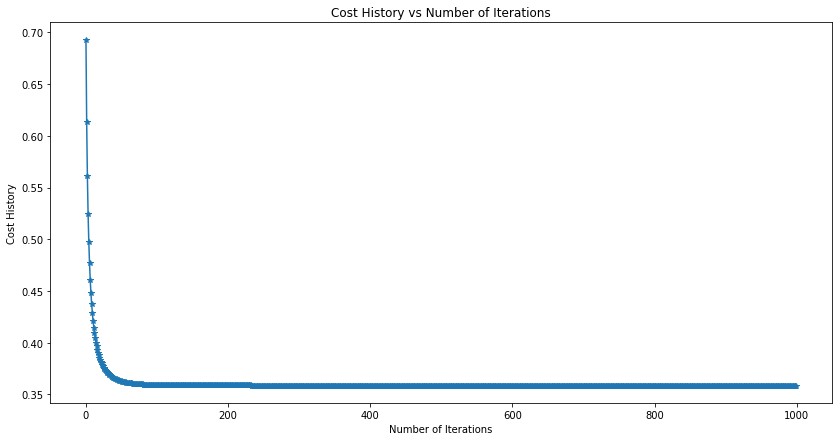

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(1,1,1)
ax.plot(cost_history,marker = '*')
ax.set_ylabel('Cost History')
ax.set_xlabel('Number of Iterations')
ax.set_title('Cost History vs Number of Iterations')

In [0]:
initial_theta= np.array([0, 0, 0,0,0,0,0,0,0,0,0]).reshape(-1,1)

In [0]:
initial_theta

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [0]:
for i in range(len(X)):
    z = sigmoid(np.dot(X,theta_result))

In [0]:
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

TypeError: ignored

In [0]:
def classifierPredict(theta,X):
    predictions = X.dot(theta)
    
    return predictions>0

In [0]:
p=classifierPredict(theta_result,X_test)
print("Test Accuracy:", sum(p==y_test)[0])

Test Accuracy: 6311


In [0]:
len(y_test)

7541

# Question 4


In [0]:
newdata = fit.copy()

In [0]:
abc = newdata[:10]
abc.drop (['Salary'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
abc

,Age,Education_num,Martial_status,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country
0,39,13,1,3,0,1,1,0,40,1
1,50,13,0,2,0,1,0,0,13,1
2,38,9,1,3,0,1,0,0,40,1
3,53,7,0,2,3,1,0,0,40,1
4,28,13,0,1,3,0,0,0,40,0
5,37,14,0,1,0,0,0,0,40,1
6,49,5,1,3,3,0,0,0,16,0
7,52,9,0,2,0,1,0,0,45,1
8,31,14,1,3,0,0,1,0,50,1
9,42,13,0,2,0,1,1,0,40,1


In [0]:
abc = abc[:2]
abc

,Age,Education_num,Martial_status,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country
0,39,13,1,3,0,1,1,0,40,1
1,50,13,0,2,0,1,0,0,13,1


In [0]:
dummy1  = abc.head(1).copy()

In [0]:
dummy2 = abc.head(1).copy()

In [0]:
dummy1 = dummy1.append(dummy2,ignore_index=True)

In [0]:
dummy1

,Age,Education_num,Martial_status,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country
0,39,13,1,3,0,1,1,0,40,1
1,39,13,1,3,0,1,1,0,40,1


In [0]:
dummy1.loc[[1],'Education_num'] = 1


In [0]:
dummy1

,Age,Education_num,Martial_status,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country
0,39,13,1,3,0,1,1,0,40,1
1,39,1,1,3,0,1,1,0,40,1


In [0]:
abc.loc[[0],'Education_num'] = 13

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
abc

,Age,Education_num,Martial_status,Relationship,Race,Sex,Capital_gain,Capital_loss,hours_per_week,native_country
0,39,13,1,3,0,1,1,0,40,1
1,50,4,0,2,0,1,0,0,13,1


In [0]:
abc= np.array(abc)

In [0]:
abc

array([[39, 13,  1,  3,  0,  1,  1,  0, 40,  1],
       [50,  4,  0,  2,  0,  1,  0,  0, 13,  1]])

In [0]:
#standardizing abc
from sklearn.datasets import load_iris
from sklearn import preprocessing

# Data Normalization
normalized_X = preprocessing.scale(dummy1)
x1= normalized_X # Normalised Data
y # Price
x1= np.asarray(x1)

In [0]:
x1

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [0]:
y1 = y[0:2]
y1

array([[1],
       [1]])

In [0]:
x1=np.hstack(((np.ones(len(x1))).reshape(-1,1),x1))
x1 = np.asarray(x1)

In [0]:
x1

array([[ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [0]:
for i in range(len(x1)):
    z = sigmoid(np.dot(x1,theta_result))

In [0]:
z

array([[0.71786004],
       [0.94279349]])

In [0]:
 1-z

array([[0.28213996],
       [0.05720651]])